In [62]:
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmocean.cm as cmo
import dedalus.public as d3

import sys
sys.path.append("../../../dedalus_subroutines")
from isospectrum import isospectrum

In [71]:
snapname = '../2LayQG_snap/2LayQG_snap_s16.h5'
diagname = '../2LayQG_diag/2LayQG_diag_s1.h5'
xi = 1.5

# snapname = '../2LayQG_jets_snap_save/2LayQG_jets_snap_s1.h5'
# diagname = '../2LayQG_jets_diag_save/2LayQG_jets_diag_s1.h5'
# xi = 0.4

with h5py.File(diagname, mode='r') as file:
    a_group_key = list(file.keys())
    print(a_group_key)
    
    print(file['scales'])
    print(list(file['scales']))
    print(file['tasks'])
    print(list(file['tasks']))

['scales', 'tasks']
<HDF5 group "/scales" (6 members)>
['constant', 'iteration', 'sim_time', 'timestep', 'wall_time', 'write_number']
<HDF5 group "/tasks" (2 members)>
['KE1', 'KE2']


In [72]:
with h5py.File(snapname, mode='r') as file:
    
    psi1_data = np.squeeze(np.array(file['tasks']['psi1']))
    print(psi1_data.shape)
    q1_data = np.squeeze(np.array(file['tasks']['q1']))
    q2_data = np.squeeze(np.array(file['tasks']['q2']))
    
    sim_time_ary = np.array(file['scales']['sim_time'])
    print(sim_time_ary)
    
    x = np.array(file['scales'][list(file['scales'])[-2]])
    y = np.array(file['scales'][list(file['scales'])[-1]])
#     print(diag_time_ary)

(20, 512, 512)
[149.99999909 150.49994969 151.00006515 151.50002956 151.99995119
 152.49998844 153.00002981 153.50008185 154.00004407 154.49993276
 154.99994732 155.49996715 155.99997011 156.50001785 156.99998785
 157.5000517  157.99997467 158.49999399 158.99997478 159.50003362]


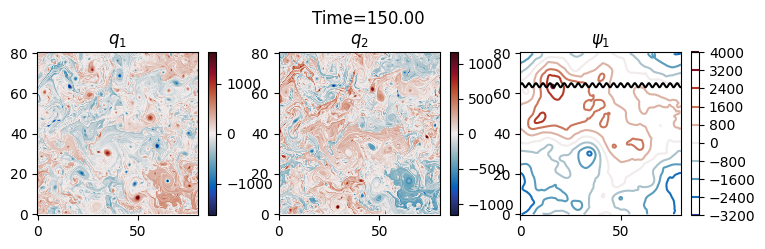

In [73]:
time_idx = 0
L = x[-1]+(x[-1]-x[-2])

bg_meanQ1 = (xi**(-2)+8)*y*1
# bg_meanQ2 = (xi**(-2)-8)*y*0

fig=plt.figure(figsize=(15/1.7, 3.6/1.7))
# fig=plt.figure(figsize=(15, 3.5))
# fig=plt.figure(figsize=(11, 4))
fig.suptitle('Time=%.2f' %(sim_time_ary[time_idx]), y=1.08)
plt.subplot(1, 3, 1)
plt.pcolormesh(x,y,(q1_data[time_idx,:,:]).T, cmap=cmo.balance, norm=colors.CenteredNorm())
# plt.plot(x,np.sin(x*0.634*np.sqrt(8)-0.0)+L*0.8,'k')
# plt.plot(np.sin(y*0.5/xi)+L/2,y,'k')
# plt.axhline(5)

plt.axis('equal')
cbar = plt.colorbar();
plt.title('$q_1$')

plt.subplot(1, 3, 2)
maxq = np.max(abs(q1_data[time_idx,:,:]))
# plt.pcolormesh(x,y,(q1_data[time_idx,:,:]+bg_meanQ1).T, cmap=cmo.balance, vmin=-maxq+(xi**(-2)+8)*0, vmax=maxq+(xi**(-2)+8)*L)
plt.pcolormesh(x,y,(q2_data[time_idx,:,:]).T, cmap=cmo.balance, norm=colors.CenteredNorm())
plt.axis('equal')
cbar = plt.colorbar();
# plt.title('$q_1$+mean')
plt.title('$q_2$')

plt.subplot(1, 3, 3)
plt.contour(x,y,psi1_data[time_idx,:,:].T, cmap=cmo.balance, norm=colors.CenteredNorm())
plt.plot(x,np.sin(x*0.634*np.sqrt(8)-0.0)+L*0.8,'k')
plt.axis('equal')
cbar = plt.colorbar();
plt.title('$\psi_1$')

figname = 'figs/2Lay_q1_t%.2f' %sim_time_ary[time_idx]
figname = figname.replace(".", "d" ); figname = figname+'.png'
# plt.savefig(figname, bbox_inches='tight', dpi=400)
plt.show()

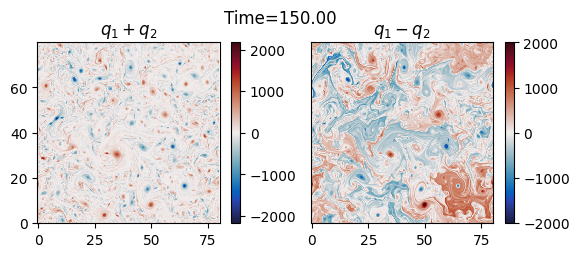

In [78]:
# time_idx = -1
# L = x[-1]+(x[-1]-x[-2])
# xi = 1.5

fig=plt.figure(figsize=(11/1.7, 4/1.7))
# fig=plt.figure(figsize=(11, 4))
# fig=plt.figure(figsize=(11, 4))
fig.suptitle('Time=%.2f' %(sim_time_ary[time_idx]), y=1.02)
plt.subplot(1, 2, 1)
plt.pcolormesh(x,y,(q1_data[time_idx,:,:]+q2_data[time_idx,:,:]).T, cmap=cmo.balance, norm=colors.CenteredNorm())

# plt.plot(x,np.sin(x*0.634*np.sqrt(8)-0.0)+L/2,'k')
# plt.plot(np.sin(y*0.5/xi)+L/2,y,'k')
# plt.axhline(5)

plt.axis('equal')
cbar = plt.colorbar();
plt.title('$q_1+q_2$')

plt.subplot(1, 2, 2)
plt.pcolormesh(x,y,(q1_data[time_idx,:,:]-q2_data[time_idx,:,:]).T, cmap=cmo.balance, norm=colors.CenteredNorm())
plt.axis('equal')
cbar = plt.colorbar();
plt.title('$q_1-q_2$')

frame1 = plt.gca(); frame1.axes.get_yaxis().set_visible(False)

figname = 'figs/2Lay_qbrbc_t%.2f' %sim_time_ary[time_idx]
figname = figname.replace(".", "d" ); figname = figname+'.png'
# plt.savefig(figname, bbox_inches='tight', dpi=400)
plt.show()

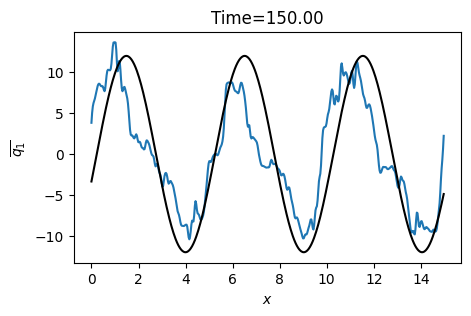

In [40]:
bg_meanQ1 = (xi**(-2)+8)*y*0
bg_meanQ2 = (xi**(-2)-8)*y*0

zmeanQ1 = np.mean(q1_data[time_idx,:,:],axis=0)+bg_meanQ1
zmeanQ2 = np.mean(q2_data[time_idx,:,:],axis=0)+bg_meanQ2

plt.figure(figsize=(5, 3))
plt.plot(y,zmeanQ1)
# plt.plot(y,zmeanQ2)
plt.plot(y,np.sin(y*0.5/xi+6)*12,'k')
plt.xlabel('$x$'); plt.ylabel('$\overline{q_1}$')
plt.title('Time=%.2f' %(sim_time_ary[time_idx]))

figname = 'figs/2Lay_q1zonalmean_t%.2f' %sim_time_ary[time_idx]
figname = figname.replace(".", "d" ); figname = figname+'.pdf'
# plt.savefig(figname, bbox_inches='tight')

/state/partition1/job-36668080/ipykernel_3879547/459393714.py:45: UserWarning: The label '_nolegend_' of <matplotlib.lines.Line2D object at 0x145ff47e0100> starts with '_'. It is thus excluded from the legend.
  plt.legend(['_nolegend_', 'Second line'])


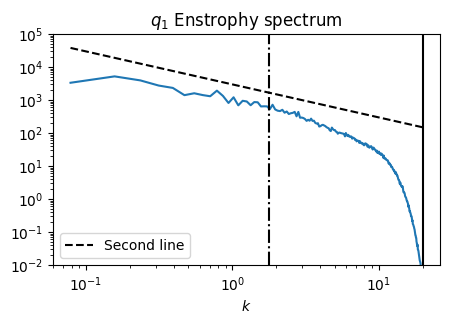

In [95]:
# Numerics Parameters
# L = x[-1]+(x[-1]-x[-2])
Lx, Ly = L, L
Nx, Ny = psi1_data.shape[2], psi1_data.shape[2]

dealias = 3/2
dtype = np.float64

# Bases
coords = d3.CartesianCoordinates('x', 'y')
dist = d3.Distributor(coords, dtype=dtype)
xbasis = d3.RealFourier(coords['x'], size=Nx, bounds=(0, Lx), dealias=dealias)
ybasis = d3.RealFourier(coords['y'], size=Ny, bounds=(0, Ly), dealias=dealias)

# Fields
q1 = dist.Field(name='q1', bases=(xbasis,ybasis))

time_idx = 0
q1['g'] = q1_data[time_idx,:,:]

q1_mag2d = q1['c']*np.conj(q1['c'])
q1_spec = isospectrum(q1_mag2d)

######
KK = xbasis.wavenumbers[2:-1:2]

# plt.figure(figsize=(5, 3))
# plt.pcolormesh(q1_mag2d)
# plt.show()

plt.figure(1,figsize=(5, 3))

plt.loglog(KK,q1_spec[1:],label="%.1f" %sim_time_ary[time_idx])

plt.loglog(KK,KK**-1*3e3,'--',color='k')
plt.axvline(KK[-1],color='k')
plt.axvline(0.634*np.sqrt(8),linestyle='-.',color='k')
# plt.axvline(0.5/xi,color='k')

# plt.ylim([1e-6,1e2])
plt.ylim([1e-2,1e5])
plt.title('$q_1$ Enstrophy spectrum')
plt.xlabel('$k$')

plt.legend(['_nolegend_', 'Second line'])

plt.show()

figname = 'figs/2Lay_q1spec_t%.2f' %sim_time_ary[time_idx]
figname = figname.replace(".", "d" ); figname = figname+'.pdf'
# plt.savefig(figname, bbox_inches='tight')

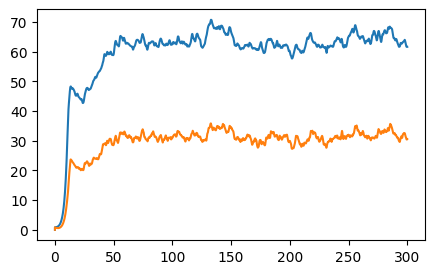

In [8]:
with h5py.File(diagname, mode='r') as file:
    
    KE1_data = np.squeeze(np.array(file['tasks']['KE1']))
    KE2_data = np.squeeze(np.array(file['tasks']['KE2']))
#     print(KE1_data.shape)
    diag_time_ary = np.array(file['scales']['sim_time'])

plt.figure(figsize=(5, 3))

lim = min(diag_time_ary.shape[0],KE1_data.shape[0])
# plt.semilogy(diag_time_ary[:lim],KE1_data[:lim])
# plt.semilogy(diag_time_ary[:lim],KE2_data[:lim])
plt.plot(diag_time_ary[:lim],KE1_data[:lim])
plt.plot(diag_time_ary[:lim],KE2_data[:lim])

plt.show()

figname = 'figs/2Lay_KEhist_t%.2f' %sim_time_ary[time_idx]
figname = figname.replace(".", "d" ); figname = figname+'.pdf'
# plt.savefig(figname, bbox_inches='tight')